origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [1]:
%matplotlib inline
from __future__ import print_function

# 用PyTorch的nn模块构建神经网络
对于具有复杂定义的运算以及自动微分求解，计算图和自动求导是一个强有力的范型。然而对于大规模的神经网络，原生的自动求导稍微有些低级。

在构建神经网络时，会将计算整合到若干**layer**之中，这些**layer**包含的可学习的参数，将会在学习过程中得到优化。

在TensorFlow中，**Keras**、**TensorFlow-Slim**和**TFLearn**提供了相比原生的计算图更高的抽象，以用于构造神经网络。

在PyTorch中，**nn**包与前面提到的包目的相同。**nn**包定义了一组**Module**，这些模型等价于神经网络的层。一个模型接受输入变量并计算输出变量，同时保持内部状态（例如包含可学习参数的变量）。**nn**包还定义了一系列在训练神经网络时常用的损失函数。

下面的例子将使用**nn**包来实现一个两层神经网络：

In [2]:
import torch
from torch.autograd import Variable

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建存储输入和输出的张量，并将他们封装到变量中
x = Variable(torch.randn(N, D_in)) # 默认情况下，requires_grad为False
y = Variable(torch.randn(N, D_out), requires_grad=False)

# 用nn包将我们的模型定义为一连串的层。
# nn.Sequential是一个包含其他模块的模块，将其包含的模块按顺序排列以计算输出。
# 每个Linear模块用一个线性函数计算对应的输出，并保持存储weight与bias的内部变量。
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# nn包还包含了很多流行的损失函数，在这个例子中使用MSE作为损失函数
loss_fn = torch.nn.MSELoss(size_average=False)

# 设置学习率
learning_rate = 1e-4

losses = []

for t in range(500):
    # 前馈：通过将x传递给模型来计算y的预测值。Module对象重写了__call__方法，
    # 因此可以像函数一样调用它们。当调用model时，会根据输入的变量计算并返回
    # 输出变量。
    y_pred = model(x)
    
    # 计算并打印loss。将包含y的预测和真值的变量传递给损失函数，损失函数将返回
    # 一个包含loss的变量。
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])
    
    losses.append(loss.data[0])
    
    # 在反向传播之前，将梯度缓存清零
    model.zero_grad()
    
    # 反向传播：计算损失函数关于模型所有可学习变量的梯度。模型的参数保存在设置
    # requires_grad=True的变量中，该调用将计算模型中所有可学习参数的梯度。
    loss.backward()
    
    # 用梯度下降算法更新权重。每个参数都是一个变量，可以访问其data和gradient。
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 691.479919434
1 635.040222168
2 587.841674805
3 546.770385742
4 510.628631592
5 478.636138916
6 450.029968262
7 424.070465088
8 400.21862793
9 378.05166626
10 357.333862305
11 338.107025146
12 320.132446289
13 303.188293457
14 287.206665039
15 272.148529053
16 257.843963623
17 244.263092041
18 231.360992432
19 219.097946167
20 207.346725464
21 196.180633545
22 185.550170898
23 175.435241699
24 165.801925659
25 156.637557983
26 147.895126343
27 139.572387695
28 131.68019104
29 124.185707092
30 117.078025818
31 110.349388123
32 103.991912842
33 97.9828186035
34 92.3059310913
35 86.9406433105
36 81.8730773926
37 77.0937271118
38 72.5701904297
39 68.3101196289
40 64.2962341309
41 60.5037231445
42 56.9379920959
43 53.580657959
44 50.4292526245
45 47.4685249329
46 44.682559967
47 42.0603256226
48 39.5956993103
49 37.2849159241
50 35.1084022522
51 33.062877655
52 31.1399459839
53 29.3365001678
54 27.6437473297
55 26.054271698
56 24.5605735779
57 23.1598758698
58 21.8464012146
59 20.60875892

490 8.31175111671e-06
491 8.08716140455e-06
492 7.86735199654e-06
493 7.65472759667e-06
494 7.44708950151e-06
495 7.24555184206e-06
496 7.05009688318e-06
497 6.85872691975e-06
498 6.67351559969e-06
499 6.49278626952e-06


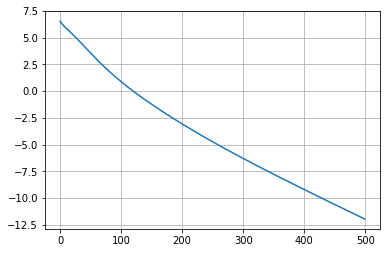

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log(losses))
plt.grid()